In [1]:
import pandas as pd # importing pandas with synonamys pd
import numpy as np  # importing numpy with synonamys np 
from matplotlib import pyplot as plt # importing pyplot from matplotlibwith synonamys plt 

import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Height-Weight Data.csv') # uploading file and making dataframe as the name df

In [4]:
df.head() # viewing firet 5 data set

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df. shape # viewing row and columns where 3501 rows and 2 columns

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Data Set')

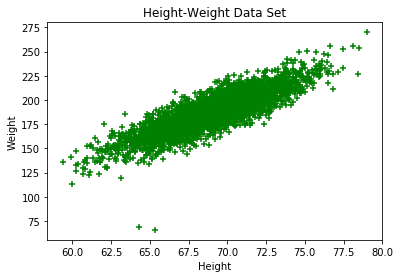

In [12]:
plt.scatter(df.Height , df.Weight, color='green', marker='+')
# creating plot using Height and Weight values where x = Height & y = Weight
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Data Set')

In [13]:
x = df.drop('Weight', axis=1) # Weight  value assigning to x varaible.
y = df[['Weight']] # Weight value assigning to x varaible.

In [14]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [15]:
x.mean() # avarage Hight

Height    69.024411
dtype: float64

In [16]:
x.min() # Mininmam Hight

Height    59.38065
dtype: float64

# train_test_split

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =.25, random_state=0) # random_state used to fixed kernel data
# seperating traning & test data using train_test_split class

In [23]:
xtrain.head()

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


# Linear Regression

In [24]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(xtrain, ytrain) # training the model. This is the main work 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
m = lr.coef_
m

array([[5.96613032]])

In [30]:
c = lr.intercept_
c

array([-224.98706384])

In [32]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [33]:
#x = int(input('Enter area Hight feet : '))
#yp = (m*x + c)
#print ('Predicted Weight: ', yp)
yp = (m*73.847017 + c)
yp


array([[215.59386349]])

In [34]:
lr.predict([[73.847017]]) # This is the main predicting or model
#array([[215.59386349]])

array([[215.59386349]])

In [36]:
df['Predicted_Weight'] = lr.predict(x) 

Text(0.5, 1.0, 'Height-Weight Data Set')

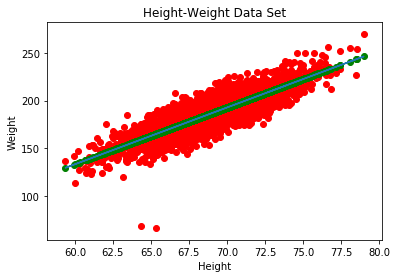

In [49]:
plt.plot(x, df[['Predicted_Weight']])

plt.scatter(x, df[['Weight']], color='red')
plt.scatter(x, df[['Predicted_Weight']], color='green')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height-Weight Data Set')

# mean_squared_error & mean_absolute_error

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
mse = mean_squared_error(ytest, lr.predict(xtest))
mse # It is used to calculate cost value which is the total difference of lost value
# mse is used most time

103.70875574105969

In [44]:
mae = mean_absolute_error(ytest, lr.predict(xtest))
mae

8.145588569833933

In [46]:
lr.score(xtest, ytest) # Testing accuract score 

0.7400625947962998

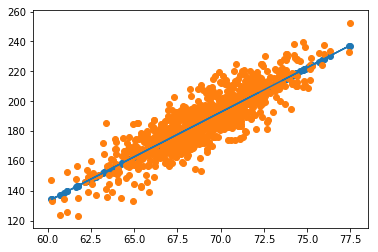

In [48]:
plt.plot(xtest, lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_Weight']])
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['rent']])
plt.scatter(xtest, ytest)